#### Import of Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [3]:
df = pd.read_csv('datasets/magic/magic.csv')
#df=df.drop(columns=["at1"])
df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)


In [4]:
df.head(5)

,FLength,FWidth,FSize,FConc,FConc1,FAsym,FM3Long,FM3Trans,FAlpha,FDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FLength   900 non-null    float64
 1   FWidth    900 non-null    float64
 2   FSize     900 non-null    float64
 3   FConc     900 non-null    float64
 4   FConc1    900 non-null    float64
 5   FAsym     900 non-null    float64
 6   FM3Long   900 non-null    float64
 7   FM3Trans  900 non-null    float64
 8   FAlpha    900 non-null    float64
 9   FDist     900 non-null    float64
 10  Class     900 non-null    object 
dtypes: float64(10), object(1)
memory usage: 77.5+ KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

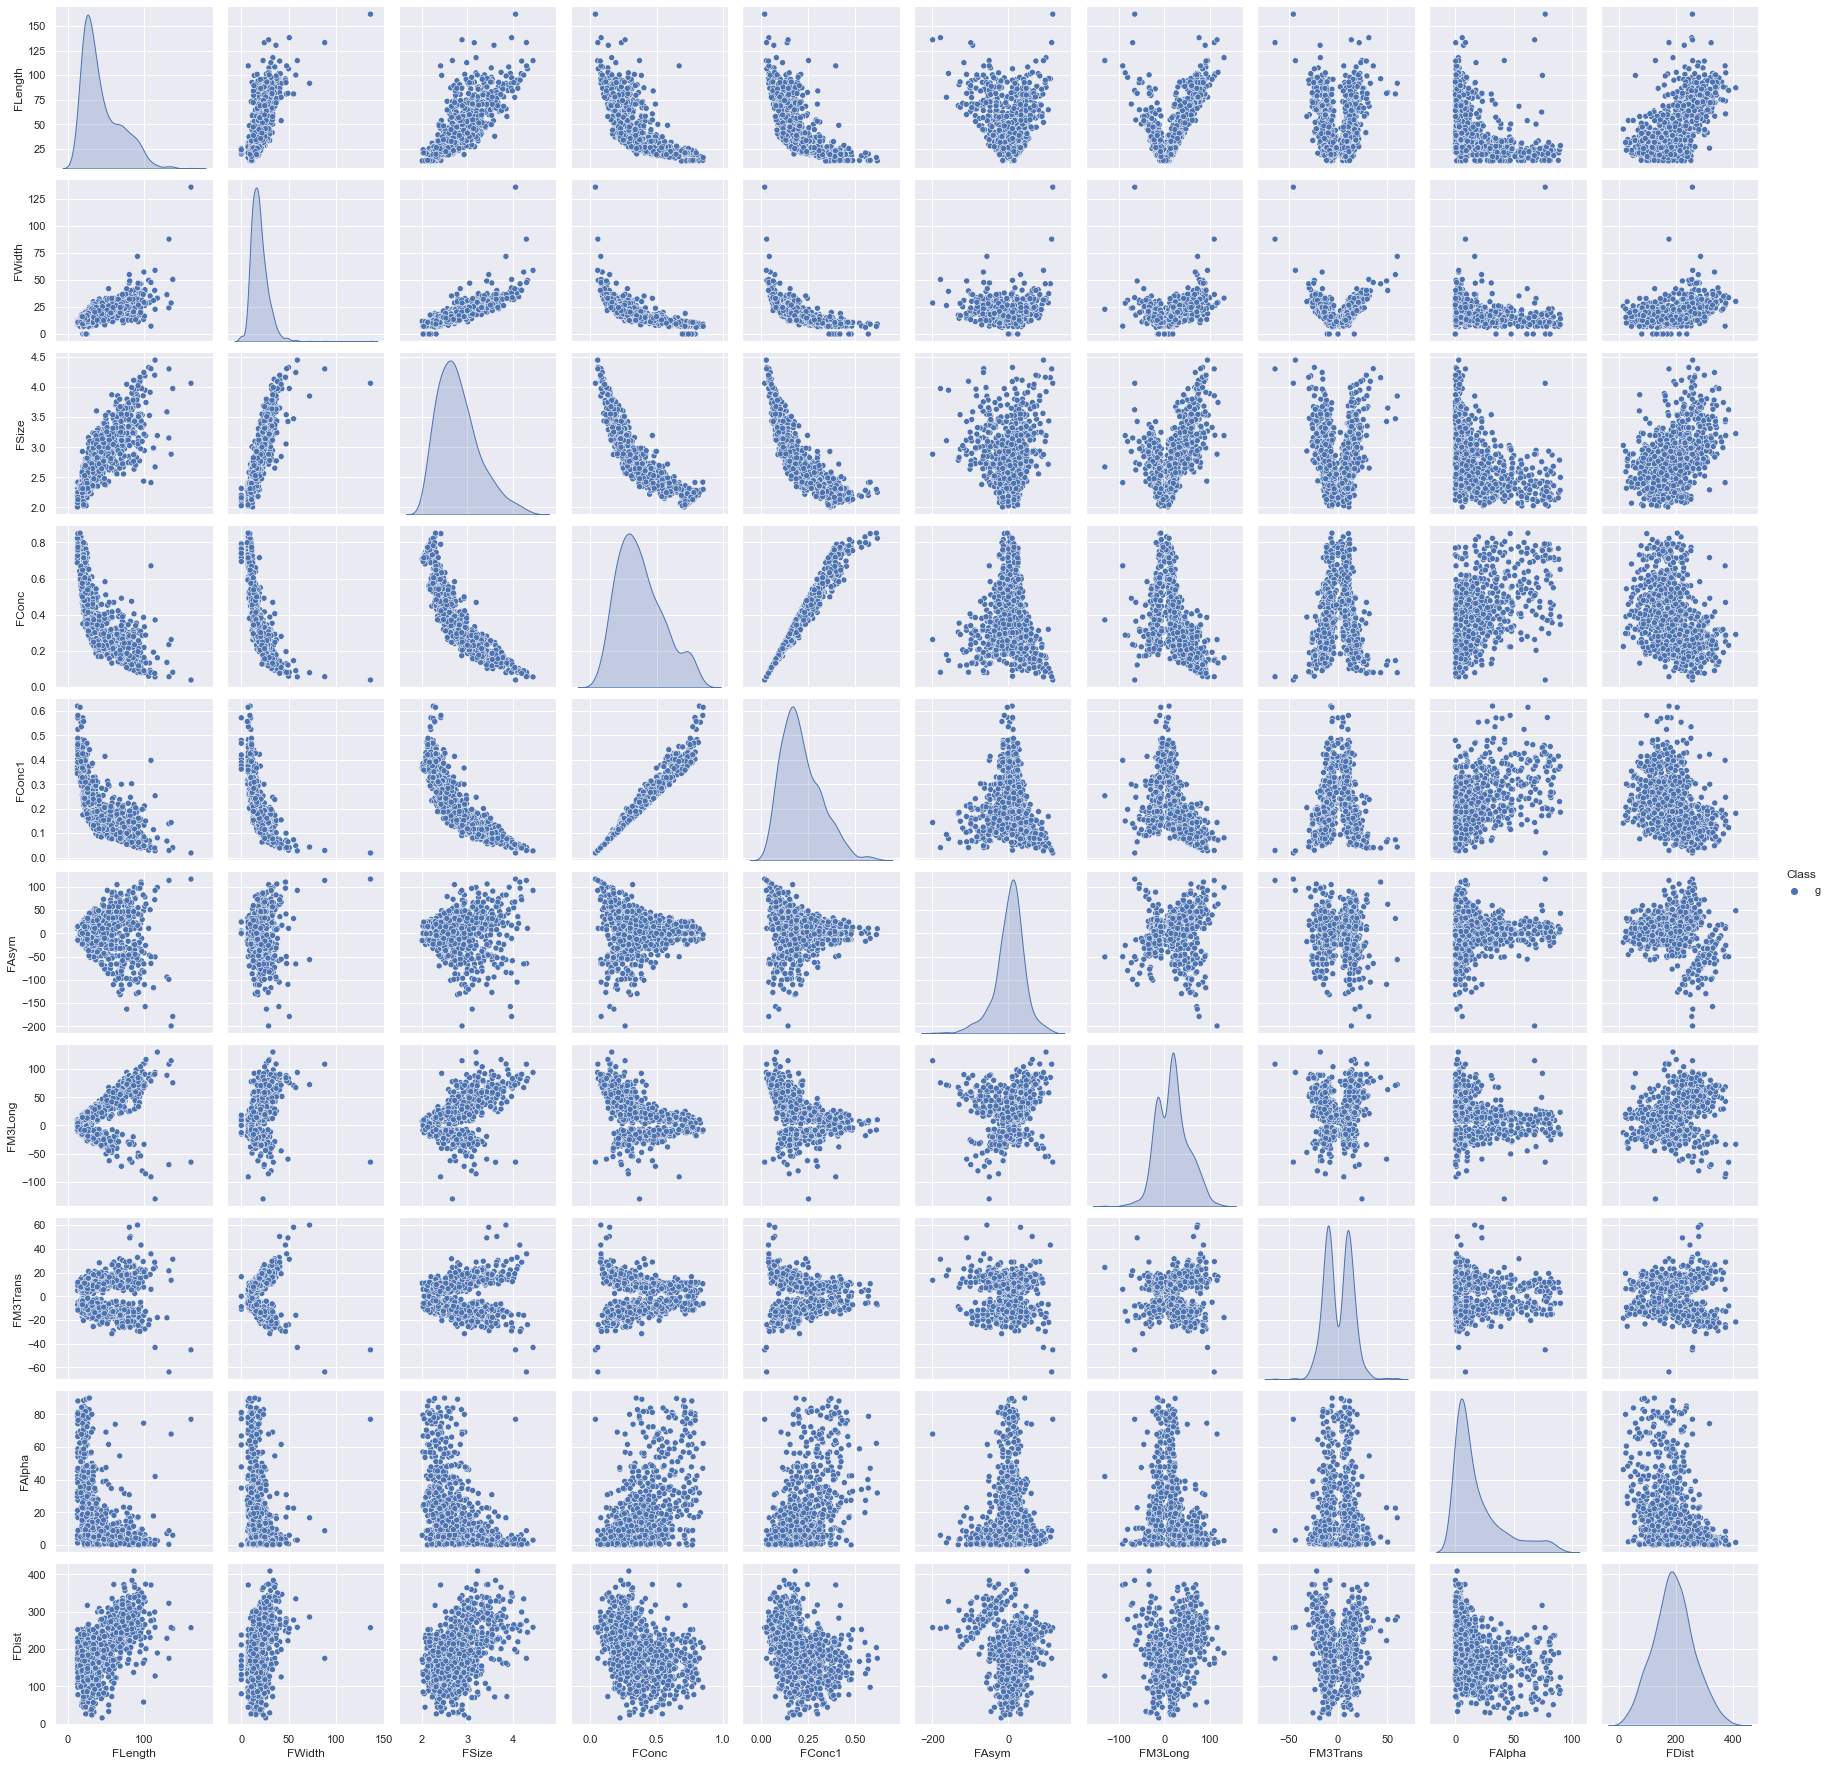

In [6]:
sns.pairplot(df, hue='Class')
plt.show()

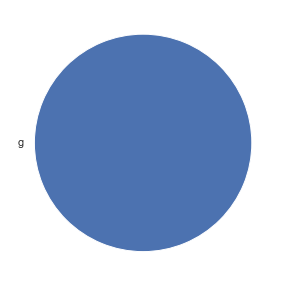

In [7]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [8]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FLength,900.0,43.827283,25.236170,12.4392,24.151075,35.25380,59.106425,162.0520
FWidth,900.0,18.918494,9.581364,0.0000,12.631925,17.46925,22.994425,136.0310
FSize,900.0,2.799317,0.461005,2.0065,2.452600,2.72710,3.044025,4.4451
FConc,900.0,0.376714,0.174010,0.0374,0.246825,0.34675,0.485375,0.8521
FConc1,900.0,0.212704,0.105707,0.0187,0.137575,0.19190,0.276900,0.6190
FAsym,900.0,2.913227,39.388537,-199.5110,-15.181500,7.30890,25.732325,116.7410
FM3Long,900.0,17.209060,33.892783,-130.1030,-10.313225,17.01720,37.485150,129.9320
FM3Trans,900.0,0.259415,13.759587,-63.8020,-10.718150,0.00000,10.885750,60.0190
FAlpha,900.0,18.695840,21.158554,0.0000,3.962425,9.62000,25.611875,89.9535
FDist,900.0,190.446255,69.626962,15.3696,143.627500,188.78750,233.609500,408.4530


#### Standardize the Data

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FLength,900.0,1.421085e-16,1.000556,-1.244465,-0.780116,-0.339919,0.605783,4.687338
FWidth,900.0,1.046077e-16,1.000556,-1.975607,-0.656489,-0.151341,0.425638,12.229743
FSize,900.0,-4.342206e-17,1.000556,-1.720713,-0.752508,-0.156739,0.531108,3.571971
FConc,900.0,-1.105289e-16,1.000556,-1.951053,-0.746863,-0.172295,0.624797,2.733460
FConc1,900.0,1.697408e-16,1.000556,-1.836327,-0.711127,-0.196919,0.607640,3.845754
FAsym,900.0,0.000000e+00,1.000556,-5.142023,-0.459646,0.111660,0.579656,2.891477
FM3Long,900.0,-8.289665e-17,1.000556,-4.348831,-0.812491,-0.005664,0.598575,3.327718
FM3Trans,900.0,1.776357e-17,1.000556,-4.658355,-0.798256,-0.018864,0.772715,4.345538
FAlpha,900.0,7.796233e-17,1.000556,-0.884098,-0.696721,-0.429183,0.327049,3.369667
FDist,900.0,-5.408020e-16,1.000556,-2.515893,-0.672797,-0.023837,0.620266,3.132809


#### Observations and Variables

In [10]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

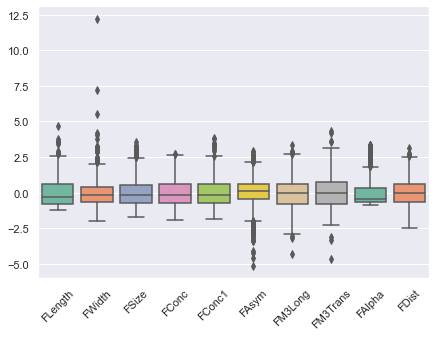

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

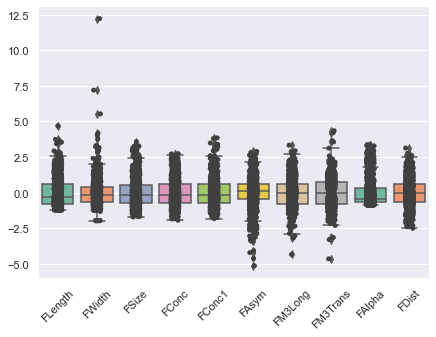

In [12]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

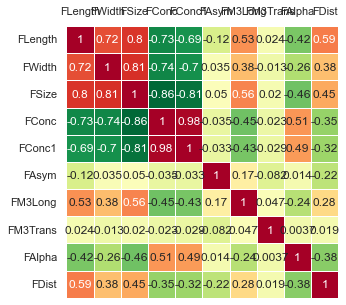

In [13]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [14]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [15]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.089272,1.553860,-0.059876,0.841836,-0.144495,-0.652790,-0.225231
1,-1.465630,0.231349,-0.799839,-1.383259,0.669820,0.059150,0.556901
2,7.896183,3.316830,-3.144451,7.572826,1.174474,6.922465,4.536658
3,-2.698914,0.534140,-0.537403,-0.892753,-0.209518,-0.001714,0.982410
4,2.415600,-1.598957,1.007276,-0.632489,0.845513,1.426476,0.196499
...,...,...,...,...,...,...,...
895,-0.197179,1.365273,-0.500873,1.083471,-0.187034,-0.886142,-0.050795
896,-0.689260,0.379385,0.985735,0.889178,-0.862692,-0.841449,-0.059785
897,-1.910794,0.235415,0.991219,1.202441,0.379110,0.696645,-0.811070
898,-1.360576,0.057256,-0.513162,-0.166540,0.496781,-0.029131,0.576650


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [98.55%] of the variance'}, xlabel='PC1 (49.9% expl.var)', ylabel='PC2 (12.4% expl.var)'>)

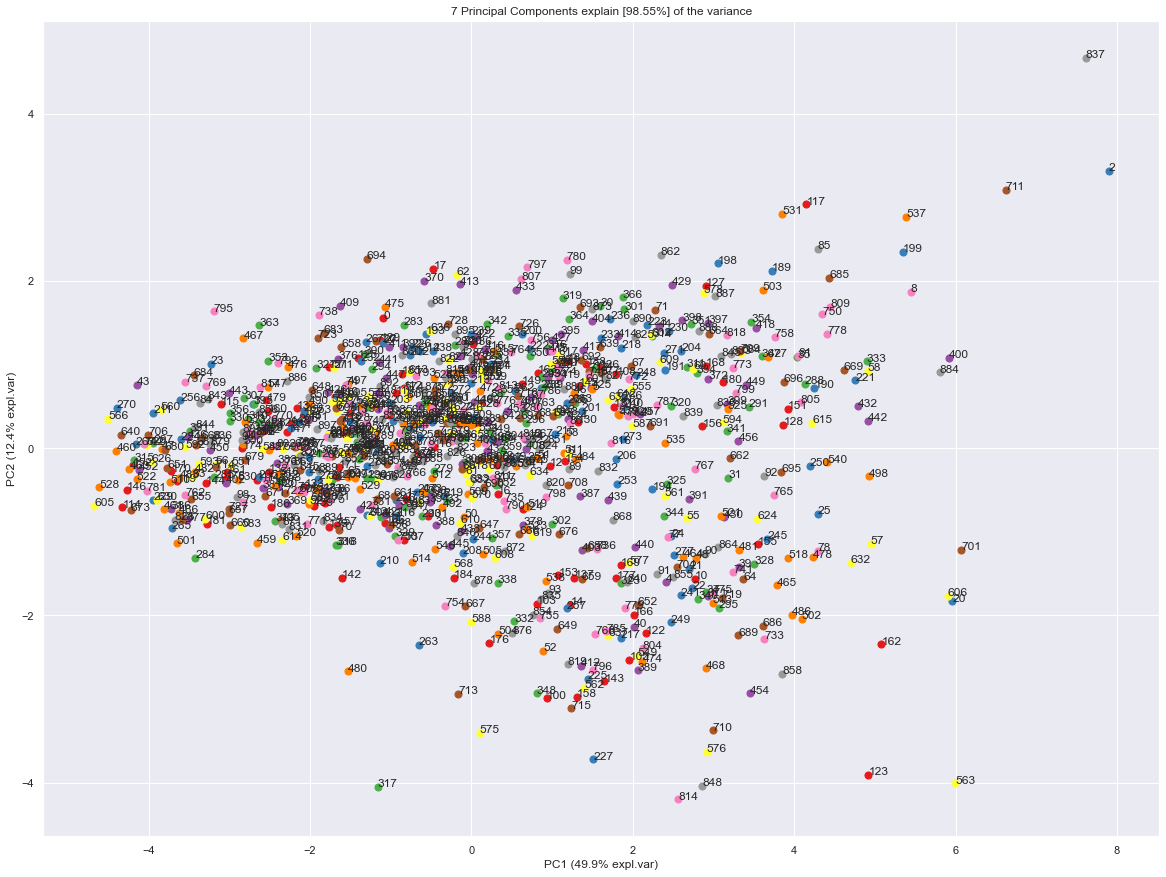

In [16]:
model.scatter(label=True, legend=False)

Eigenvectors

In [17]:
A = out['loadings'].T

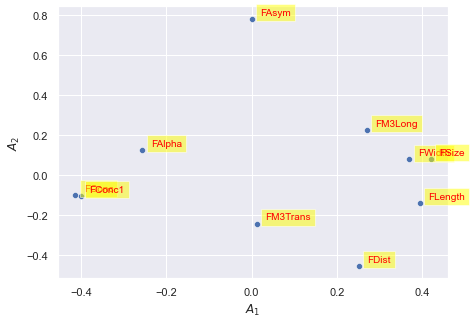

In [18]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

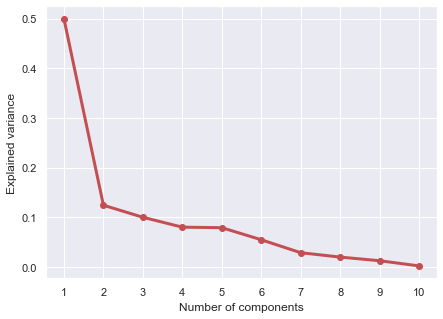

In [19]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

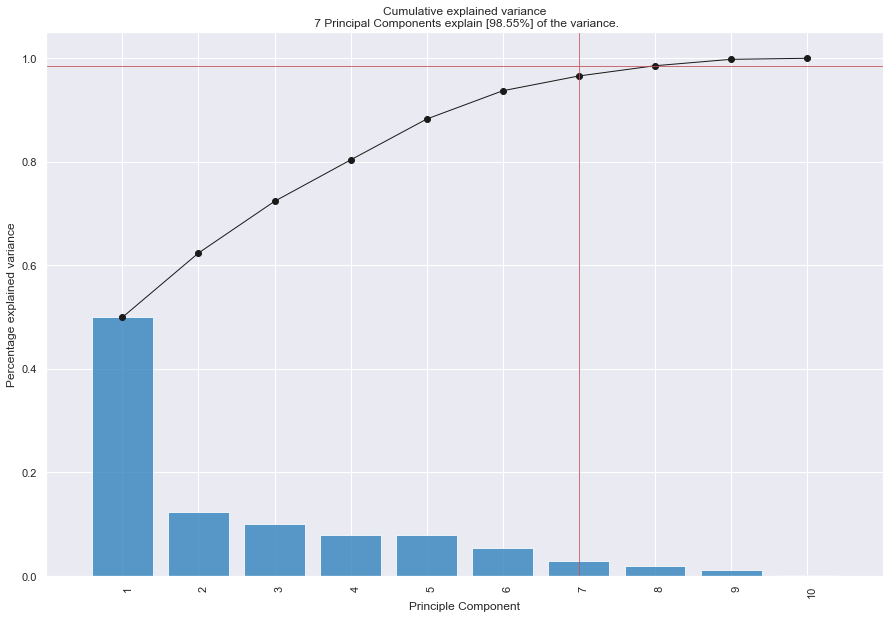

<Figure size 504x360 with 0 Axes>

In [20]:
model.plot();